In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!ls ../zippeddata/

bom.movie_gross.csv.gz  rt.movie_info.tsv.gz    tn.movie_budgets.csv.gz
im.db                   rt.reviews.tsv.gz
im.db.zip               tmdb.movies.csv.gz


In [3]:
bom_df = pd.read_csv('../zippedData/bom.movie_gross.csv.gz')
bom_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [4]:
bom_df['foreign_gross'] = bom_df['foreign_gross'].str.replace(',', '')

In [5]:
bom_df['total_gross'] = bom_df['foreign_gross'].astype(float) + bom_df['domestic_gross']

In [6]:
tn_df = pd.read_csv('../zippedData/tn.movie_budgets.csv.gz')
tn_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [7]:
tn_df['production_budget'] = tn_df['production_budget'].str.replace('$', '')
tn_df['production_budget'] = tn_df['production_budget'].str.replace(',', '')

In [8]:
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].str.replace('$', '')
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].str.replace(',', '')

In [9]:
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].astype(int)
tn_df['production_budget'] = tn_df['production_budget'].astype(int)

In [10]:
tn_df['movie'] = tn_df['movie'].str.replace(' ', '')
tn_df['movie'] = tn_df['movie'].str.lower()

In [11]:
tn_df = tn_df.loc[(tn_df['production_budget'] >= 50000) & (tn_df['worldwide_gross'] != 0)]
tn_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",avatar,425000000,"$760,507,625",2776345279
1,2,"May 20, 2011",piratesofthecaribbean:onstrangertides,410600000,"$241,063,875",1045663875
2,3,"Jun 7, 2019",darkphoenix,350000000,"$42,762,350",149762350
3,4,"May 1, 2015",avengers:ageofultron,330600000,"$459,005,868",1403013963
4,5,"Dec 15, 2017",starwarsep.viii:thelastjedi,317000000,"$620,181,382",1316721747
...,...,...,...,...,...,...
5715,16,"Aug 9, 1995",thebrothersmcmullen,50000,"$10,426,506",10426506
5716,17,"Mar 16, 2001",gabriela,50000,"$2,335,352",2335352
5717,18,"Nov 12, 2010",tinyfurniture,50000,"$391,674",424149
5718,19,"Feb 22, 2008",thesignal,50000,"$251,150",406299


In [12]:
tn_df['release_date'] = pd.to_datetime(tn_df['release_date'])

<ipython-input-12-7755ff507f5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tn_df['release_date'] = pd.to_datetime(tn_df['release_date'])


In [13]:
tn_df['ROI %'] = (tn_df['worldwide_gross'] / tn_df['production_budget']) * 100

<ipython-input-13-5229f739cab4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tn_df['ROI %'] = (tn_df['worldwide_gross'] / tn_df['production_budget']) * 100


In [14]:
tn_df = tn_df.sort_values('ROI %', ascending=False)

In [15]:
tn_df = tn_df.loc[tn_df['ROI %'] > .1]

In [16]:
tn_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI %
5613,14,1980-03-21,madmax,200000,"$8,750,000",99750000,49875.000000
5492,93,2009-09-25,paranormalactivity,450000,"$107,918,810",194183034,43151.785333
5679,80,2015-07-10,thegallows,100000,"$22,764,410",41656474,41656.474000
5406,7,1999-07-14,theblairwitchproject,600000,"$140,539,099",248300000,41383.333333
5709,10,2004-05-07,supersizeme,65000,"$11,529,368",22233808,34205.858462
...,...,...,...,...,...,...,...
4552,53,2013-02-22,inescapable,4000000,"$4,327",4327,0.108175
4641,42,1956-02-16,carousel,3380000,$0,3604,0.106627
5518,19,2005-10-13,thedarkhours,400000,$423,423,0.105750
5466,67,2018-05-11,higherpower,500000,$528,528,0.105600


In [17]:
tn_df['start_year'] = pd.DatetimeIndex(tn_df['release_date']).year
tn_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI %,start_year
5613,14,1980-03-21,madmax,200000,"$8,750,000",99750000,49875.000000,1980
5492,93,2009-09-25,paranormalactivity,450000,"$107,918,810",194183034,43151.785333,2009
5679,80,2015-07-10,thegallows,100000,"$22,764,410",41656474,41656.474000,2015
5406,7,1999-07-14,theblairwitchproject,600000,"$140,539,099",248300000,41383.333333,1999
5709,10,2004-05-07,supersizeme,65000,"$11,529,368",22233808,34205.858462,2004
...,...,...,...,...,...,...,...,...
4552,53,2013-02-22,inescapable,4000000,"$4,327",4327,0.108175,2013
4641,42,1956-02-16,carousel,3380000,$0,3604,0.106627,1956
5518,19,2005-10-13,thedarkhours,400000,$423,423,0.105750,2005
5466,67,2018-05-11,higherpower,500000,$528,528,0.105600,2018


In [18]:
con = sqlite3.connect('../zippedData/im.db')

In [19]:
query = '''
SELECT 
    movie_id,
    primary_title as movie,
    start_year,
    runtime_minutes,
    genres
FROM 
    movie_basics
WHERE
    runtime_minutes is not Null AND movie_id is not Null
    and primary_title is not Null AND original_title is not Null and start_year is not Null and genres is not Null
'''

imdb = pd.read_sql(query, con)

In [20]:
imdb['movie'] = imdb['movie'].str.lower()

In [21]:
imdb['movie'] = imdb['movie'].str.replace(' ', '')

In [22]:
imdb

,movie_id,movie,start_year,runtime_minutes,genres
0,tt0063540,sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,onedaybeforetherainyseason,2019,114.0,"Biography,Drama"
2,tt0069049,theothersideofthewind,2018,122.0,Drama
3,tt0100275,thewanderingsoapopera,2017,80.0,"Comedy,Drama,Fantasy"
4,tt0111414,athinlife,2018,75.0,Comedy
...,...,...,...,...,...
112227,tt9916160,drømmeland,2019,72.0,Documentary
112228,tt9916170,therehearsal,2019,51.0,Drama
112229,tt9916186,illenau-diegeschichteeinerehemaligenheil-undpf...,2017,84.0,Documentary
112230,tt9916190,safeguard,2019,90.0,"Drama,Thriller"


In [23]:
final_data = pd.merge(tn_df,imdb,on = ['movie', 'start_year'])
final_data

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI %,start_year,movie_id,runtime_minutes,genres
0,80,2015-07-10,thegallows,100000,"$22,764,410",41656474,41656.474000,2015,tt2309260,81.0,"Horror,Mystery,Thriller"
1,12,2012-01-06,thedevilinside,1000000,"$53,262,945",101759490,10175.949000,2012,tt1560985,83.0,Horror
2,65,2010-10-20,paranormalactivity2,3000000,"$84,752,907",177512032,5917.067733,2010,tt1536044,91.0,Horror
3,49,2017-02-24,getout,5000000,"$176,040,665",255367951,5107.359020,2017,tt5052448,104.0,"Horror,Mystery,Thriller"
4,64,2016-10-21,moonlight,1500000,"$27,854,931",65245512,4349.700800,2016,tt4975722,111.0,Drama
...,...,...,...,...,...,...,...,...,...,...,...
1437,26,2012-12-31,foodfight!,45000000,$0,73706,0.163791,2012,tt0249516,91.0,"Action,Animation,Comedy"
1438,81,2015-05-15,area51,5000000,"$7,556",7556,0.151120,2015,tt1519461,91.0,"Horror,Sci-Fi,Thriller"
1439,48,2015-11-11,10daysinamadhouse,12000000,"$14,616",14616,0.121800,2015,tt3453052,111.0,Drama
1440,74,2012-10-26,theghastlyloveofjohnnyx,2000000,"$2,436",2436,0.121800,2012,tt1754633,106.0,"Comedy,Fantasy,Musical"


In [24]:
final_data['release_month'] = pd.DatetimeIndex(final_data['release_date']).month
final_data

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI %,start_year,movie_id,runtime_minutes,genres,release_month
0,80,2015-07-10,thegallows,100000,"$22,764,410",41656474,41656.474000,2015,tt2309260,81.0,"Horror,Mystery,Thriller",7
1,12,2012-01-06,thedevilinside,1000000,"$53,262,945",101759490,10175.949000,2012,tt1560985,83.0,Horror,1
2,65,2010-10-20,paranormalactivity2,3000000,"$84,752,907",177512032,5917.067733,2010,tt1536044,91.0,Horror,10
3,49,2017-02-24,getout,5000000,"$176,040,665",255367951,5107.359020,2017,tt5052448,104.0,"Horror,Mystery,Thriller",2
4,64,2016-10-21,moonlight,1500000,"$27,854,931",65245512,4349.700800,2016,tt4975722,111.0,Drama,10
...,...,...,...,...,...,...,...,...,...,...,...,...
1437,26,2012-12-31,foodfight!,45000000,$0,73706,0.163791,2012,tt0249516,91.0,"Action,Animation,Comedy",12
1438,81,2015-05-15,area51,5000000,"$7,556",7556,0.151120,2015,tt1519461,91.0,"Horror,Sci-Fi,Thriller",5
1439,48,2015-11-11,10daysinamadhouse,12000000,"$14,616",14616,0.121800,2015,tt3453052,111.0,Drama,11
1440,74,2012-10-26,theghastlyloveofjohnnyx,2000000,"$2,436",2436,0.121800,2012,tt1754633,106.0,"Comedy,Fantasy,Musical",10


In [25]:
final_data.groupby('release_month').count()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI %,start_year,movie_id,runtime_minutes,genres
release_month,,,,,,,,,,,
1,67,67,67,67,67,67,67,67,67,67,67
2,94,94,94,94,94,94,94,94,94,94,94
3,124,124,124,124,124,124,124,124,124,124,124
4,98,98,98,98,98,98,98,98,98,98,98
5,100,100,100,100,100,100,100,100,100,100,100
6,120,120,120,120,120,120,120,120,120,120,120
7,122,122,122,122,122,122,122,122,122,122,122
8,123,123,123,123,123,123,123,123,123,123,123
9,142,142,142,142,142,142,142,142,142,142,142


In [26]:
num_of_movies_per_month = list(final_data.groupby('release_month').count()['id'].values)

In [27]:
num_of_movies_per_month

[67, 94, 124, 98, 100, 120, 122, 123, 142, 159, 144, 149]

In [28]:
release_months = list(final_data.groupby('release_month').count().index)

In [29]:
release_months

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

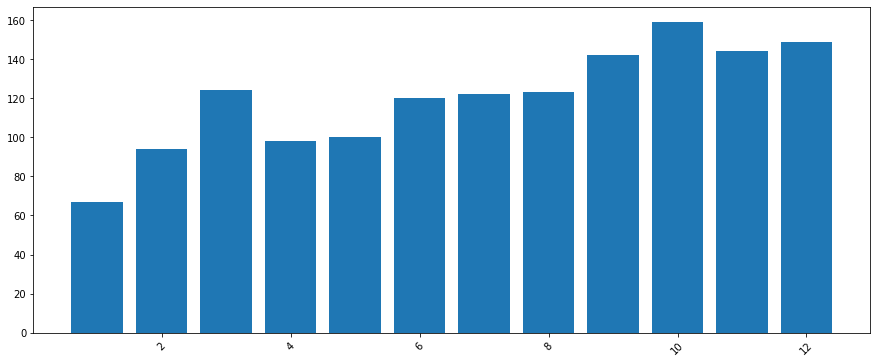

In [30]:
fig, ax = plt.subplots(figsize = (15,6))
ax.bar(x=release_months, height=num_of_movies_per_month)
plt.xticks(rotation=45);

In [31]:
roi_total_per_month = list(final_data.groupby('release_month').sum()['ROI %'].values)
roi_total_per_month

[35294.82191294925,
 37474.101171870694,
 37432.23956213785,
 33556.92157517841,
 34258.61452865965,
 44979.77848969339,
 99334.3999062032,
 39085.70322877793,
 40109.27135121549,
 69932.05986628513,
 50087.4582787247,
 45353.08894782885]

In [32]:
roi_per_month = [i / j for i, j in zip(roi_total_per_month, num_of_movies_per_month)]
roi_per_month

[526.7883867604365,
 398.6606507645819,
 301.8728996946601,
 342.4175670936572,
 342.5861452865965,
 374.83148741411156,
 814.2163926737967,
 317.7699449494141,
 282.459657402926,
 439.8242758885857,
 347.82957138003263,
 304.3831473008648]

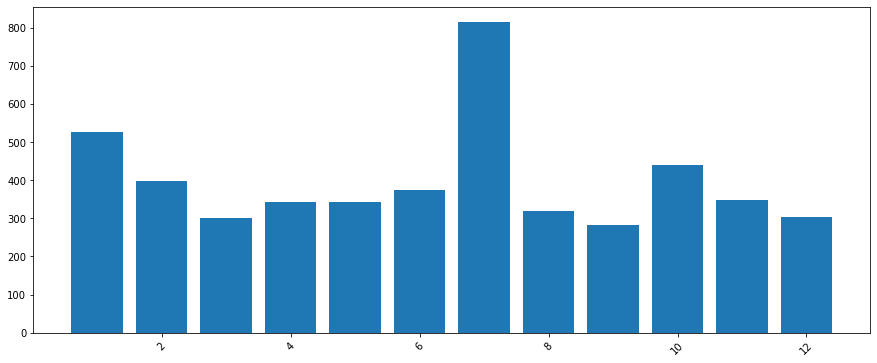

In [33]:
fig, ax = plt.subplots(figsize = (15,6))
ax.bar(x=release_months, height=roi_per_month)
plt.xticks(rotation=45);

In [34]:
final_data_genres = final_data.copy()

In [35]:
final_data_genres['genres'] = final_data_genres['genres'].str.split(',')

In [36]:
final_data_genres = final_data_genres.explode('genres')

In [37]:
final_data_genres

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI %,start_year,movie_id,runtime_minutes,genres,release_month
0,80,2015-07-10,thegallows,100000,"$22,764,410",41656474,41656.474000,2015,tt2309260,81.0,Horror,7
0,80,2015-07-10,thegallows,100000,"$22,764,410",41656474,41656.474000,2015,tt2309260,81.0,Mystery,7
0,80,2015-07-10,thegallows,100000,"$22,764,410",41656474,41656.474000,2015,tt2309260,81.0,Thriller,7
1,12,2012-01-06,thedevilinside,1000000,"$53,262,945",101759490,10175.949000,2012,tt1560985,83.0,Horror,1
2,65,2010-10-20,paranormalactivity2,3000000,"$84,752,907",177512032,5917.067733,2010,tt1536044,91.0,Horror,10
...,...,...,...,...,...,...,...,...,...,...,...,...
1440,74,2012-10-26,theghastlyloveofjohnnyx,2000000,"$2,436",2436,0.121800,2012,tt1754633,106.0,Fantasy,10
1440,74,2012-10-26,theghastlyloveofjohnnyx,2000000,"$2,436",2436,0.121800,2012,tt1754633,106.0,Musical,10
1441,67,2018-05-11,higherpower,500000,$528,528,0.105600,2018,tt2924392,93.0,Action,5
1441,67,2018-05-11,higherpower,500000,$528,528,0.105600,2018,tt2924392,93.0,Sci-Fi,5


In [38]:
ft_count = final_data_genres.groupby('genres').count().sort_values(by='id',ascending = False)
ft_count

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI %,start_year,movie_id,runtime_minutes,release_month
genres,,,,,,,,,,,
Drama,696,696,696,696,696,696,696,696,696,696,696
Comedy,502,502,502,502,502,502,502,502,502,502,502
Action,431,431,431,431,431,431,431,431,431,431,431
Adventure,350,350,350,350,350,350,350,350,350,350,350
Thriller,242,242,242,242,242,242,242,242,242,242,242
Crime,224,224,224,224,224,224,224,224,224,224,224
Romance,189,189,189,189,189,189,189,189,189,189,189
Horror,159,159,159,159,159,159,159,159,159,159,159
Biography,135,135,135,135,135,135,135,135,135,135,135


In [39]:
ft_genres = list(ft_count.index)

In [40]:
ft_num = list(ft_count['id'].values)

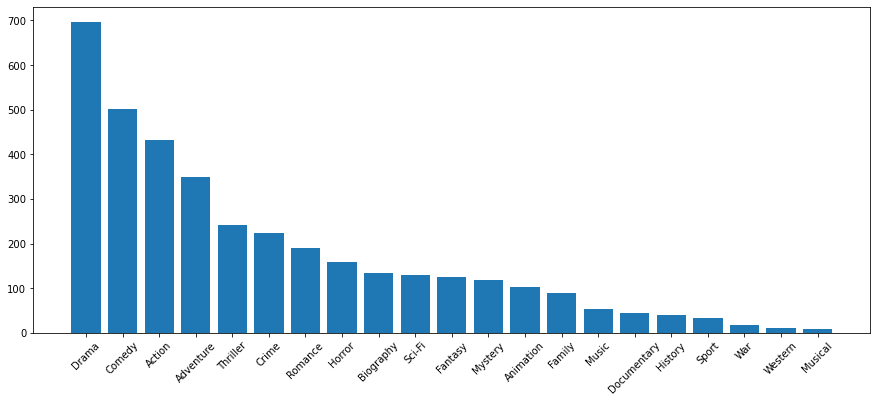

In [41]:
fig, ax = plt.subplots(figsize = (15,6))
ax.bar(x=ft_genres, height=ft_num)
plt.xticks(rotation=45);